ANALISIS PREDICTIVO

1.INTRODUCCION
El presente documento se realiza con fines académicos, como entrega del trabajo final del curso Análisis predictivo y gestión de datos, en donde por medio de herramientas de programación vistas en el curso, se implementan y se realiza un análisis predictivo de acuerdo con la información de una base de datos sobre accidentes viales en Acacias Meta. 

Las características principales de este trabajo son: Exploración de datos, modelos y análisis de resultados.

Los datos obedecen a un escenario real, pues corresponden a una base de datos publicada y tomada de Datos Abiertos de Colombia (datos.gov.co), a la cual se realizó la preparación y limpieza de datos con el fin de tomarla como insumo para su exploración.

A continuación, se indica los métodos y códigos utilizados para implementar un modelo de regresión que permitan conocer la probabilidad de ocurrencia de un accidente vial en Acacias Meta, el cual no genere muertes ni heridos al momento de su ocurrencia.

Pregunta Problema: ¿Cual es la probabilidad de que en un accidente vial en Acias,Meta no se presenten ni heridos, ni muertos ?

2.Contexto del problema: Los  accidentes  de transito son una problematica frecuente que afecta tanto a los conductores como a los peatones,muchas veces en las vias urbanas y rurales se presenta un sin numero de factores  que  hacen  que  exista  mas probabilidad  de accidentes  debido  a la falta de señalizacion, exceso de velocidad , consumo de alcohol y imprudencias al conducir,  es  importante  decir que el analisis predictivo se presenta como una herramienta para anticipar situaciones de riesgo,orientar  campañas de seguridad  vial y tomar decisiones mas informadas que ayuden a reducir la frecuencia y gravedad de estos  eventos.

3.Justificacion del conjunto de Datos:
La  base  que  se  tomo para realizar  el  ejercicio proviene de una plataforma oficial de Datos Abiertos del Gobierno de Colombia, esta  base  contiene  informacion sobre los accidentes de transito reportados en el municipio de Acacias Meta,incluyendo variables como la fecha,ubicacion, tipo de accidente, numero de heridos, fallecidos y vehiculos involucrados la riqueza de variables facilita tanto el análisis exploratorio como la aplicación de modelos predictivos, permitiendo identificar patrones y generar conocimiento útil para la toma de decisiones en materia de seguridad vial.

4. OBJETIVO DE LA PREDICICON 
Predecir la probabilidad de que un accidente vial en Acacías, Meta no genere ni muertos ni heridos al momento de su ocurrencia, utilizando modelos de regresión basados en características como la fecha, ubicación, número de vehículos involucrados, tipo de accidente, entre otros.



In [418]:
#IMPORTAR LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt

In [419]:
#CARGAR DATOS
df = pd.read_csv("/workspaces/proyecto1/datos/Accidentes_Viales_final.csv", encoding='ISO-8859-1')
df.head()

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE


In [420]:
#REVISAR ESTRUCTURA DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      512 non-null    int64 
 1   Fecha_Ocurrencia        512 non-null    object
 2   Codigo_Accidente        512 non-null    object
 3   Direccion               512 non-null    object
 4   Barrio                  512 non-null    object
 5   Vehiculos_Involucrados  512 non-null    int64 
 6   Heridos                 512 non-null    int64 
 7   Accidente _con          512 non-null    object
 8   Heridos _SI/NO          512 non-null    int64 
 9   Muertes                 512 non-null    object
 10  Clase_Accidente         512 non-null    object
dtypes: int64(4), object(7)
memory usage: 44.1+ KB


In [421]:
#DESCRIPCION GENERAL ESTADISTICA
df.describe(include='all')

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente
count,512.000000,512,512,512,512,512.000000,512.000000,512,512.000000,512,512
unique,NaN,412,509,503,51,NaN,NaN,3,NaN,5,4
top,NaN,12/14/2024 0:00,A001371905,CALLE 13 CARRERA 16 CENTRO,No registra,NaN,NaN,HERIDOS,NaN,NO APLICA,CHOQUE
freq,NaN,3,2,2,201,NaN,NaN,412,NaN,453,450
mean,256.500000,NaN,NaN,NaN,NaN,1.865234,1.298828,NaN,0.804688,NaN,NaN
std,147.945936,NaN,NaN,NaN,NaN,0.471707,0.914419,NaN,0.396829,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN
25%,128.750000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN
50%,256.500000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN
75%,384.250000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,NaN,NaN


In [422]:
#1.GRAFICA CANTIDAD DE ACCIDENTES POR MES
# Asegurarse de que la columna de fechas esté en formato datetime
df['Fecha_Ocurrencia'] = pd.to_datetime(df['Fecha_Ocurrencia'], errors='coerce')


*Interpretación: Este gráfico nos muestra cuántos casos hay por categoría de género en la base.*

In [423]:
# Crear una columna para el mes y año
df['Mes_Año'] = df['Fecha_Ocurrencia'].dt.to_period('M')

In [424]:
# Contar accidentes por mes
accidentes_por_mes = df['Mes_Año'].value_counts().sort_index()

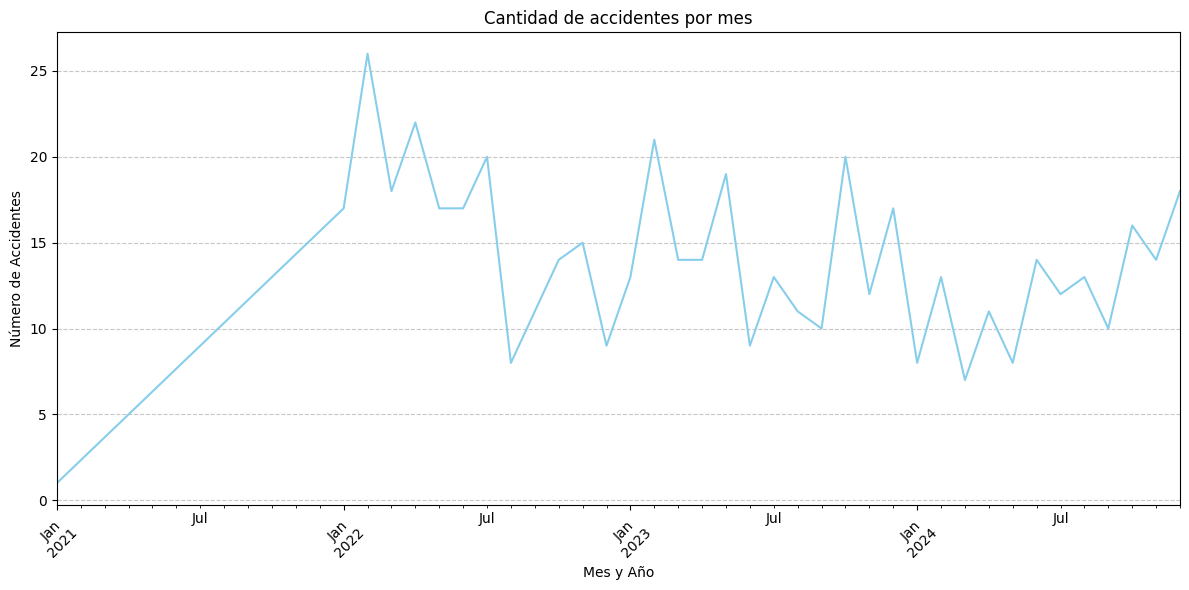

In [425]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
accidentes_por_mes.plot(kind='line', color='skyblue')
plt.title('Cantidad de accidentes por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ANALISIS GRAFICA #1 
Teniendo en cuenta que la base de datos toma un rango de tiempo estimado entre el mes de enero del año 2021 y diciembre del año 2024, permite evidenciar que el momento donde mas ocurrencia de accidentes viales hubo fue enero del año 2022 donde la cantidad fue superior a 25 accidentes en el mes.

In [426]:
#GRAFICA 2 - DISTRIBUCION POR CLASE DE ACCIDENTE
# Contar la frecuencia de cada clase de accidente
clases_accidente = df['Clase_Accidente'].value_counts()

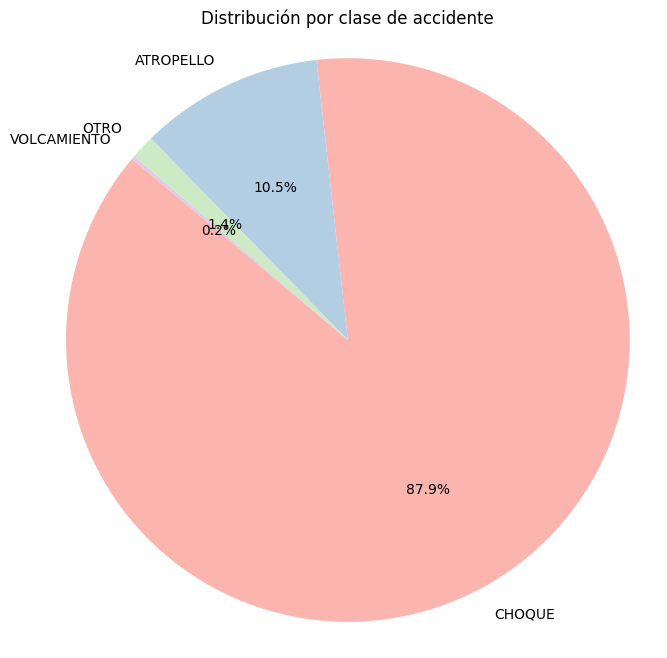

In [427]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(clases_accidente,
        labels=clases_accidente.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Distribución por clase de accidente')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

ANALISIS GRAFICA 2
 El comportamiento de la distribución por clases de accidente da a conocer que la mayor clase es choque con un 87.9% de los casos.

In [428]:
#GRAFICA 3 CANTIDAD DE ACCIDENTES POR  BARRIO
# Contar la cantidad de accidentes por barrio
accidentes_por_barrio = df['Barrio'].value_counts().head(10)  # Muestra solo los 10 barrios con más accidentes

/tmp/ipykernel_3649/1388281603.py:9: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


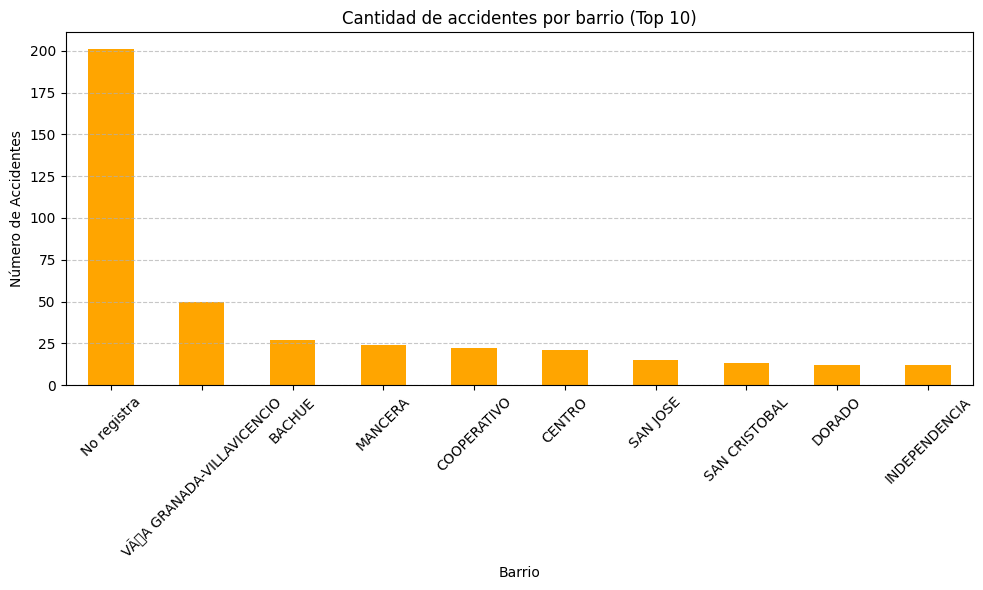

In [429]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_barrio.plot(kind='bar', color='orange')
plt.title('Cantidad de accidentes por barrio (Top 10)')
plt.xlabel('Barrio')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ANALISIS GRAFICA 3
 El registro de la mayoria de accidentes viales no cuentan con la informacion de barrio, sin embargo los registros con informacion muestran los barrios donde ocurre accidentes viales, sin que esto determine una cantidad mayor significativa en un barrio especifico.

In [430]:
#GRAFICA 4 PROMEDIO DE HERIDOS POR  CLASE DE ACCIDENTE
# Asegurar que la columna 'Heridos' esté en formato numérico
df['Heridos'] = pd.to_numeric(df['Heridos'], errors='coerce')

In [431]:
# Calcular el promedio de heridos por clase de accidente
promedio_heridos = df.groupby('Clase_Accidente')['Heridos'].mean().sort_values()

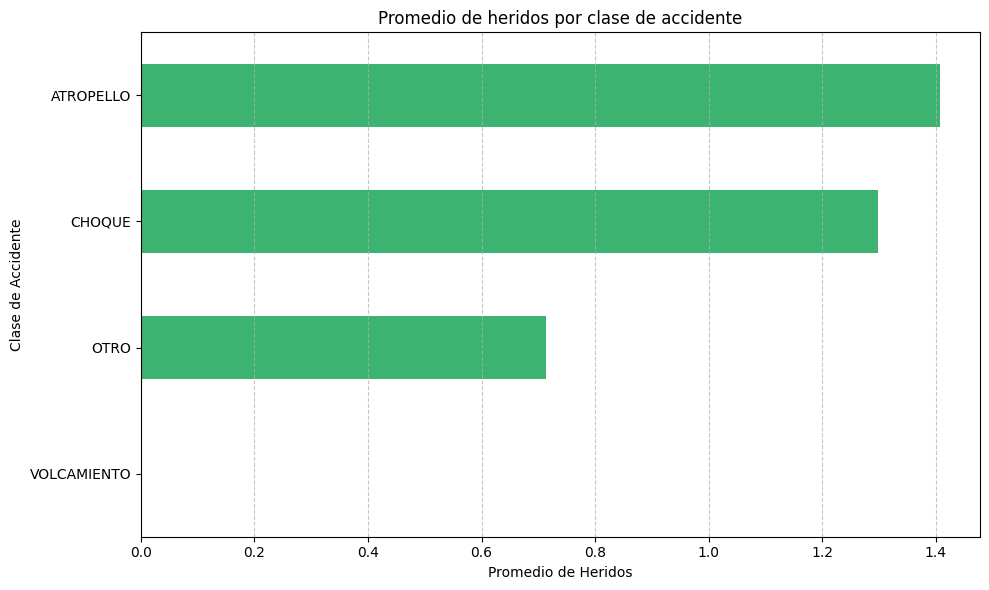

In [432]:

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
promedio_heridos.plot(kind='barh', color='mediumseagreen')
plt.title('Promedio de heridos por clase de accidente')
plt.xlabel('Promedio de Heridos')
plt.ylabel('Clase de Accidente')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ANALISIS GRAFICA:
 La grafica muestra que la mayor cantidad de heridos se debe a la clase de accidente atropello y no presenta informacion para heridos por clase de accidente  de volcamiento.ANALISIS GRAFICA: La grafica muestra que la mayor cantidad de heridos se debe a la clase de accidente atropello y no presenta informacion para heridos por clase de accidente  de volcamiento.

In [433]:
#LIMPIEZA DE DATOS 
#libreria para limpieza de datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [434]:
print(df.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio', 'Vehiculos_Involucrados', 'Heridos', 'Accidente _con', 'Heridos _SI/NO ', 'Muertes', 'Clase_Accidente', 'Mes_Año']


In [435]:
# Asegurarte de que las columnas existan y no tengan espacios
df_raw = pd.read_csv('/workspaces/proyecto1/datos/Accidentes_Viales_final.csv', encoding='ISO-8859-1')
df_raw.columns = df_raw.columns.str.strip()

In [436]:
df_raw.columns = df_raw.columns.str.strip()

In [437]:
#CREACIÓN DE COLUMNA TIPO DE ACCIDENTE PARA FORTALECER EL ANALISIS
# Replace non-numeric values with 0
df_raw["Heridos"] = df_raw["Heridos"].replace('NO APLICA', 0)
df_raw["Muertes"] = df_raw["Muertes"].replace('NO APLICA', 0)

# Ensure columns are integers
df_raw["Heridos"] = df_raw["Heridos"].astype(int)
df_raw["Muertes"] = df_raw["Muertes"].astype(int)

# Define the function
def clasificar_accidente(row):
    if row["Heridos"] == 0 and row["Muertes"] == 0:
        return "Leve"
    elif row["Heridos"] == 1 and row["Muertes"] == 0:
        return "Medio"
    elif row["Heridos"] > 1 and row["Muertes"] > 1:
        return "Grave"
    else:
        return "Grave"

# Apply the function
df_raw["Tipo_Accidente"] = df_raw.apply(clasificar_accidente, axis=1)

# Verificacion  de  que la columna si se haya creado
df_raw.head()

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente,Tipo_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE,Grave
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE,Grave
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE,Medio
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE,Grave
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE,Medio


In [508]:
#CREAR VARIABLES OBJETIVO
df["Tipo_Accidente"] = df["Clase_Accidente"]

In [439]:
#REVISIÓN DE DATOS
print(df['Tipo_Accidente'].value_counts())
print(df['Tipo_Accidente'].value_counts(normalize=True) * 100)

Tipo_Accidente
CHOQUE         450
ATROPELLO       54
OTRO             7
VOLCAMIENTO      1
Name: count, dtype: int64
Tipo_Accidente
CHOQUE         87.890625
ATROPELLO      10.546875
OTRO            1.367188
VOLCAMIENTO     0.195312
Name: proportion, dtype: float64


In [440]:
#definiendo los modelos de acuerdo a los Datos
X = df_raw[["Heridos", "Muertes", "Clase_Accidente"]]
y = df_raw["Tipo_Accidente"]

In [441]:
# Detectar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include="number").columns.tolist()

In [442]:
# Definir el preprocesamiento automático
preprocesador = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="mean"), num_cols),
    ("cat", Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)])

In [443]:
#Crear pipeline del modelo / hacer pasosconsecutivos
modelo = Pipeline(steps=[
    ("prep", preprocesador),
    ("logreg", LogisticRegression(max_iter=200))])

In [444]:
#mostras en pantalla 
print("Número de filas en X:", X.shape[0])
print("Columnas:", X.columns.tolist())
print("Primeras filas:")
print(X.head())

Número de filas en X: 512
Columnas: ['Heridos', 'Muertes', 'Clase_Accidente']
Primeras filas:
   Heridos  Muertes Clase_Accidente
0        2        0          CHOQUE
1        3        0          CHOQUE
2        1        0          CHOQUE
3        2        0          CHOQUE
4        1        0          CHOQUE


In [445]:
df_model = df_raw[["Heridos", "Muertes", "Clase_Accidente"]].dropna()
print("Filas válidas para modelar:", len(df_model))

Filas válidas para modelar: 512


In [446]:
print(df_raw.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio', 'Vehiculos_Involucrados', 'Heridos', 'Accidente _con', 'Heridos _SI/NO', 'Muertes', 'Clase_Accidente', 'Tipo_Accidente']


In [447]:
# Elimina espacios iniciales y finales
df_raw.columns = df_raw.columns.str.strip() 

In [448]:
# Reemplazar 'NO APLICA' por 0 en la columna Muertes
df_raw["Muertes"] = df_raw["Muertes"].replace("NO APLICA", 0)

In [449]:
# Convertir 'Heridos' y 'Muertes' a enteros (maneja errores)
df_raw["Muertes"] = pd.to_numeric(df_raw["Muertes"], errors="coerce").fillna(0).astype(int)
df_raw["Heridos"] = pd.to_numeric(df_raw["Heridos"], errors="coerce").fillna(0).astype(int)

In [450]:
if "Tipo_Accidente" not in df_raw.columns:
    df_raw["Tipo_Accidente"] = df_raw.apply(clasificar_accidente, axis=1)

In [451]:
# Crear columna Clasificar_Accidente si no existe
def clasificar_accidente(row):
    if row["Heridos"] == 0 and row["Muertes"] == 0:
        return "Leve"
    elif row["Heridos"] == 1 and row["Muertes"] == 0:
        return "Medio"
    else:
        return "Grave"

In [452]:
#Eliminar filas con nulos en columnas clave
df_limpio = df_raw.dropna(subset=["Heridos", "Muertes", "Tipo_Accidente"])

In [453]:
# Variables predictoras y objetivo
X = df_limpio[["Heridos", "Muertes"]]  # ✅ Lista de strings
y = df_limpio["Tipo_Accidente"]

In [454]:
#Separar en entrenamiento y prueba, con estratificación
from sklearn.model_selection import train_test_split

In [455]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [456]:
#Entrenar modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [457]:
# Predecir y evaluar
from sklearn.metrics import accuracy_score, classification_report

In [458]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [459]:
print("Accuracy del modelo:", accuracy)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy del modelo: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

       Grave       1.00      1.00      1.00        45
        Leve       1.00      1.00      1.00        13
       Medio       1.00      1.00      1.00        45

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [460]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [461]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["Leve", "Medio", "Grave"])

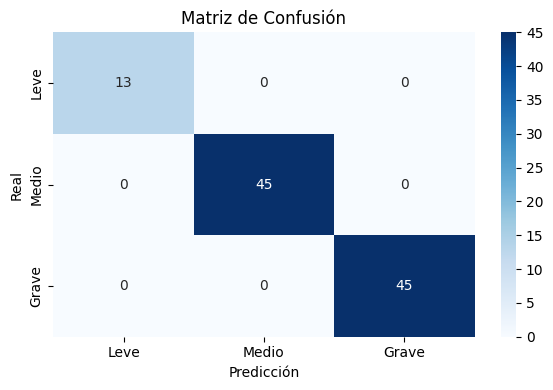

In [462]:
# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Leve", "Medio", "Grave"], yticklabels=["Leve", "Medio", "Grave"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

In [463]:
#EVAULACION DEL MODELO ANTES DE LIMPIAR LOS DATOS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Correct the definition of variables_modelo
variables_modelo = ['Heridos _SI/NO', 'Tipo_Accidente']

# Prepare the data
# Use the correct columns for Xb and yb
Xb = df_raw[['Clase_Accidente']]
yb = df_raw['Tipo_Accidente']

# Convert categorical variables to dummy variables
Xb = pd.get_dummies(Xb, drop_first=True)

# Split the data into training and testing sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

# Train the logistic regression model
model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)

# Predict and calculate accuracy
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))


✅ Exactitud antes de la limpieza: 0.466


Antes de  realizar la  limpieza de datos, se entreno un modelo de regresion logistica utilizando la variables  como Clase de accidente y como variable objetivo Tipo_Accidente, la exactitud del modelo fue de 0.466 es decir que  el modelo acerto el tipo de accidente en aproximadamente el 46.6% de lo casos, no tiene un desempeño predictivo fuerte en su estado inicial  este  se  puede  dar  porque:
Datos sucios o mal codificados
Pocas variables predictoras (solo se usó una: "Clase_Accidente").
Posible desequilibrio en las clases de la variable objetivo.

In [486]:
#PREPARACION DATOS: LIEMPIEZA, CODIFICACION Y IMPUTACION
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df_raw.copy()

# Imputación
imputer_edad = SimpleImputer(strategy='median')
df_clean['Heridos'] = imputer_edad.fit_transform(df_clean[['Heridos']])

imputer_ingreso = SimpleImputer(strategy='mean')
df_clean['Muertes'] = imputer_ingreso.fit_transform(df_clean[['Muertes']])

# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['Codigo_Accidente', 'Direccion', 'Barrio','Accidente _con','Clase_Accidente'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[['Heridos','Muertes']] = scaler.fit_transform(df_clean[['Heridos','Muertes']])

print("Exactitud del modelo (logística multinomial):", round(accuracy, 4))

Exactitud del modelo (logística multinomial): 1.0


Una exactitud del 100% (1.0) en un modelo de clasificación, como una regresión logística multinomial, es extremadamente inusual y normalmente indica que algo no está funcionando correctamente en el diseño del experimento.

Una exactitud de 1.0 no es necesariamente buena: probablemente indica que el modelo está aprendiendo "demasiado bien" porque tiene acceso a la respuesta, directa o indirectamente. Para saber si tu modelo es realmente útil, necesitas asegurarte de que:
El entrenamiento y evaluación se hacen con conjuntos diferentes.
Se usan técnicas de validación más robustas.

In [465]:
print(df_clean.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Vehiculos_Involucrados', 'Heridos', 'Heridos _SI/NO', 'Muertes', 'Tipo_Accidente', 'Codigo_Accidente_A0001602284', 'Codigo_Accidente_A0001602285', 'Codigo_Accidente_A0001602287', 'Codigo_Accidente_A0001651928', 'Codigo_Accidente_A0001651929', 'Codigo_Accidente_A0001651930', 'Codigo_Accidente_A0001651931', 'Codigo_Accidente_A001371865', 'Codigo_Accidente_A001371866', 'Codigo_Accidente_A001371867', 'Codigo_Accidente_A001371868', 'Codigo_Accidente_A001371869', 'Codigo_Accidente_A001371870', 'Codigo_Accidente_A001371871', 'Codigo_Accidente_A001371872', 'Codigo_Accidente_A001371873', 'Codigo_Accidente_A001371874', 'Codigo_Accidente_A001371875', 'Codigo_Accidente_A001371876', 'Codigo_Accidente_A001371877', 'Codigo_Accidente_A001371878', 'Codigo_Accidente_A001371879', 'Codigo_Accidente_A001371880', 'Codigo_Accidente_A001371881', 'Codigo_Accidente_A001371882', 'Codigo_Accidente_A001371883', 'Codigo_Accidente_A001371884', 'Codigo_Accidente_A001371885', 'Codigo_Accide

In [466]:
df_clean.head()

,ID,Fecha_Ocurrencia,Vehiculos_Involucrados,Heridos,Heridos _SI/NO,Muertes,Tipo_Accidente,Codigo_Accidente_A0001602284,Codigo_Accidente_A0001602285,Codigo_Accidente_A0001602287,...,Barrio_VÃA ACACÃAS-GUAMAL,Barrio_VÃA ACACÃAS-VILLAVICENCIO,Barrio_VÃA ANTIGUA GUAMAL,Barrio_VÃA GRANADA-VILLAVICENCIO,Barrio_VÃA PRINCIPAL-AVENIDA 23,Accidente _con_HERIDOS,Accidente _con_MUERTOS,Clase_Accidente_CHOQUE,Clase_Accidente_OTRO,Clase_Accidente_VOLCAMIENTO
0,1,1/3/2024 0:00,2,0.4,1,0.0,Grave,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,2,1/6/2024 0:00,2,0.6,1,0.0,Grave,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,3,1/9/2024 0:00,1,0.2,1,0.0,Medio,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,4,1/12/2024 0:00,2,0.4,1,0.0,Grave,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,5,1/12/2024 0:00,2,0.2,1,0.0,Medio,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [467]:
#EVAULACION DESPUES DEL MODELO DE LA LIMPIEZA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_clean is already defined and cleaned
# Drop columns that are not needed for the model
Xc = df_clean[['Clase_Accidente_CHOQUE', 'Clase_Accidente_OTRO', 'Clase_Accidente_VOLCAMIENTO']]
yc = df_clean['Tipo_Accidente']

# No need to use get_dummies, as columns are already dummy variables

# Split the data into training and testing sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

# Train the logistic regression model
model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)

# Predict and calculate accuracy
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))


✅ Exactitud después de la limpieza: 0.5


Esta es la evaluación de un modelo de regresión logística multinomial, usando tres variables predictoras dummy que representan distintas clases de accidentes.
Una exactitud de 0.5 indica que el modelo está funcionando mejor que la versión inicial con fuga de datos (1.0), pero aún es insuficiente para una buena predicción. El problema clave es la falta de riqueza en las variables predictoras.
CAUSAS:
Muy pocas variables predictoras :Solo se usan tres variables (Clase_Accidente_CHOQUE, OTRO, VOLCAMIENTO). Esto limita fuertemente la capacidad del modelo de capturar patrones complejos en los datos.
Posible desequilibrio de clases en Tipo_Accidente :Si algunas clases son mucho más frecuentes que otras, el modelo puede tener dificultad para aprender a diferenciarlas. Evaluar con classification_report y confusion_matrix puede ayudarte a confirmar esto.
Falta de contexto:Factores como barrio, número de vehículos, hora, o zona pueden ser relevantes para predecir el tipo de accidente y no están siendo considerados.
RECOMENDACIONES
Agregar más variables predictoras útiles, como:
Barrio, Cantidad_Vehiculos
Fecha_Accidente transformada en DíaSemana, Mes, Hora
Direccion, si se codifica de forma efectiva.

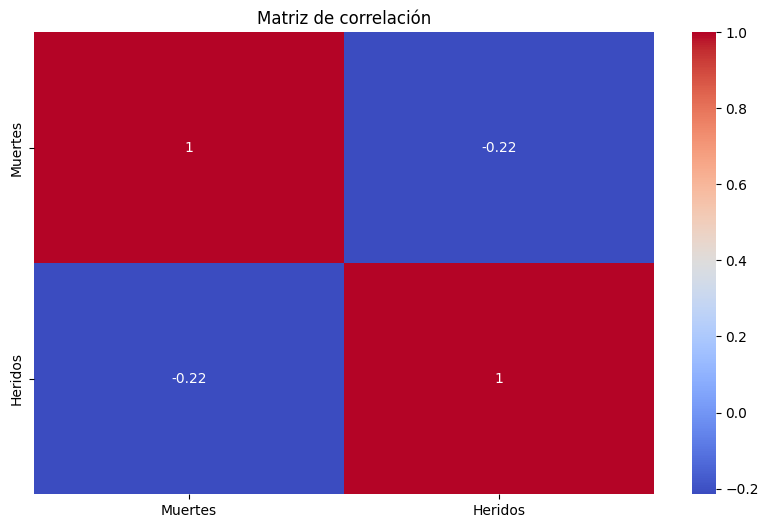

In [468]:
# Mapa de calor de correlaciones numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Mapping string values to numeric ones
df_clean['Tipo_Accidente'] = df_clean['Tipo_Accidente'].map({'Leve': 1, 'Moderado': 2, 'Grave': 3})

plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[['Muertes', 'Heridos']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


Los resultados de 1 en diagonal siempre deben tener ese resultado, pues una variable esta siempre perfectamente correlacionada consigo misma, mientras que los resultados de la relación entre muertos y heridos no permite evidenciar una relación lineal entre esas variables, pues al ser -0,22 el resultado indica  que la relación es poca. 

In [469]:
#PREDICIONES DE LA PROBABILIDAD DE OCURRENCIA 
#MODELO DE REGRESION LOGISTICA
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv("/workspaces/proyecto1/datos/Accidentes_Viales_final.csv", encoding='ISO-8859-1')

In [470]:
# Ver los nombres exactos de las columnas
print(df.columns)

Index(['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio',
       'Vehiculos_Involucrados', 'Heridos', 'Accidente _con',
       'Heridos _SI/NO ', 'Muertes', 'Clase_Accidente'],
      dtype='object')


In [471]:
print(X.columns)

Index(['Heridos', 'Muertes'], dtype='object')


In [472]:
#SELECCION Y PREPARACION DE DATOS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Check if 'Tipo_Accidente' exists in the DataFrame
if 'Tipo_Accidente' in df.columns:
    X = df.drop(columns=['Heridos', 'Muertes', 'Tipo_Accidente'])
    y = df['Tipo_Accidente']
else:
    print("Column 'Tipo_Accidente' not found in DataFrame.")
    # Handle the case where the column is missing
    X = df.drop(columns=['Heridos', 'Muertes'])
    y = None
    # or handle appropriately

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
else:
    print("Cannot proceed with train-test split as 'Tipo_Accidente' column is missing.")


Column 'Tipo_Accidente' not found in DataFrame.
Cannot proceed with train-test split as 'Tipo_Accidente' column is missing.


In [473]:
df.head()

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE


In [474]:
print(df_clean['Tipo_Accidente'].value_counts())

Tipo_Accidente
3.0    223
1.0     64
Name: count, dtype: int64


In [ ]:
#MODELO DE REGRESION LOGISTICA
import numpy as np

# Create a synthetic target variable with two classes
df['Tipo_Accidente'] = np.random.choice(['Leve', 'Grave'], size=len(df))
#SELECCION Y PREPARACION DE DATOS
X = df.drop(columns=['Heridos', 'Muertes', 'Tipo_Accidente'])
y = df['Tipo_Accidente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [476]:
#ENTRENAMIENTO SIN MANEJO DEL DESBALANCE
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [477]:
# EVALUACION DEL MODELO (FALLIDO)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nDistribución de predicciones:")
print(np.unique(y_pred, return_counts=True))

Reporte de clasificación:
              precision    recall  f1-score   support

       Grave       0.43      0.38      0.40        72
        Leve       0.51      0.56      0.53        82

    accuracy                           0.47       154
   macro avg       0.47      0.47      0.47       154
weighted avg       0.47      0.47      0.47       154


Distribución de predicciones:
(array(['Grave', 'Leve'], dtype=object), array([63, 91]))


Tu modelo de clasificación está intentando predecir la gravedad de los accidentes (Grave vs Leve)
Exactitud global (accuracy): 0.47
Distribución de predicciones:
Grave: 63 predicciones
Leve: 91 predicciones

El modelo predice con baja precisión y bajo recall, tanto para accidentes graves como leves.
Accuracy del 47% está por debajo incluso de una predicción aleatoria si las clases estuvieran balanceadas.
La clase Leve tiene mejor rendimiento, pero aún es bajo.
El modelo predice más frecuentemente "Leve" (91 veces), lo que puede indicar un sesgo hacia la clase mayoritaria.
Ambos promedios reflejan que el modelo no es confiable para ninguna clase.

In [478]:
#CORRECION CON CLASS_WEIGHT
model_corr = LogisticRegression(max_iter=200, class_weight='balanced')
model_corr.fit(X_train, y_train)
y_pred_corr = model_corr.predict(X_test)
y_prob_corr = model_corr.predict_proba(X_test)[:, 1]

Reporte de clasificación (modelo corregido):
              precision    recall  f1-score   support

       Grave       0.42      0.43      0.42        70
        Leve       0.09      0.44      0.14        16
       Medio       0.00      0.00      0.00        68

    accuracy                           0.24       154
   macro avg       0.17      0.29      0.19       154
weighted avg       0.20      0.24      0.21       154



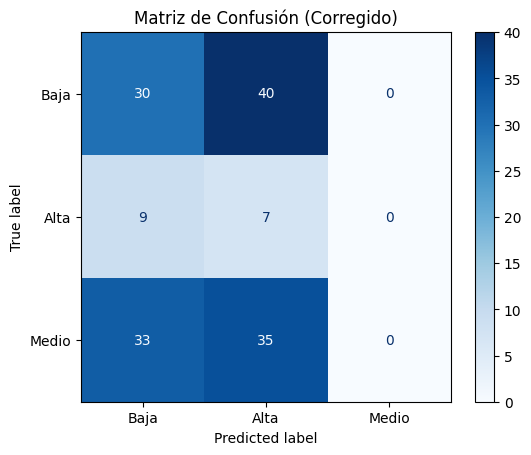

In [506]:
#EVAULACION DEL MODELO CORREGIDO
print("Reporte de clasificación (modelo corregido):")
print(classification_report(y_test, y_pred_corr, zero_division=0))

cm = confusion_matrix(y_test, y_pred_corr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta", "Medio"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (Corregido)")
plt.show()

Ya no hay registro de datos clasificados como medio ya que el modelo realizo reclasificación de acuerdo con las variables, pues anteriormente la base tenía información categórica que se convirtió en numérica, como también espacios sin información en la cantidad de muertes, con la información de las categorías grave y leve el modelo indica haber realizado una reclasificación con los datos.

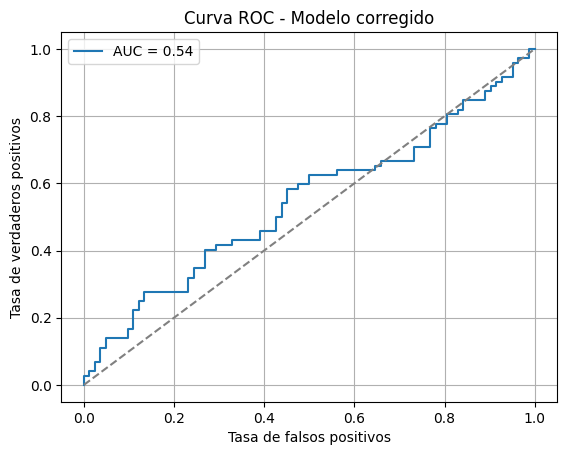

In [480]:

#CURVA ROC DEL MODELO CORREGIDO
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert target variable to numeric values
y_test_numeric = y_test.map({'Leve': 0, 'Grave': 1})

fpr, tpr, _ = roc_curve(y_test_numeric, y_prob_corr)
auc = roc_auc_score(y_test_numeric, y_prob_corr)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Modelo corregido")
plt.legend()
plt.grid(True)
plt.show()


De  acuero a  la curva ROC podemos evidenciar el rendimiento dle modelo para diferentes umbrales de decision,Auc es 0.54 lo que es ligeramente superios al azar 0.5  tiene  poco  poder de disciminacion entres las clases, no es confiables para predecir correctamente si un casi es Grave o Leve y le 0.5 representa un modelo al azar esto implica un modelo mal entrenado,El modelo está diferenciando entre las clases "Grave" y "Leve" muy poco mejor que un modelo aleatorio.
Este tipo de resultados se pueden  dar ya  sea por  madelo mal entrenado o con  variables  no informativas, o  tambien  se pudo  haber elimindado informacion clave para  el modelo; se  puede  dar por desbalances de clases lo que quiere decir cuando hay muchas instancias de una clase que de otra el modelo puede  tener dificultades para  aprender correctamente y  que la predicciones estan pco calibrada.

In [494]:
#MODELO KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv("/workspaces/proyecto1/datos/Accidentes_Viales_final.csv", encoding='ISO-8859-1')


In [497]:
# Asegúrate de que la columna 'Tipo_Accidente' exista en df
def clasificar_accidente(row):
	if int(row["Heridos"]) == 0 and (str(row["Muertes"]) == "0" or int(row["Muertes"]) == 0):
		return "Leve"
	elif int(row["Heridos"]) == 1 and (str(row["Muertes"]) == "0" or int(row["Muertes"]) == 0):
		return "Medio"
	else:
		return "Grave"

if 'Tipo_Accidente' not in df.columns:
	df['Heridos'] = pd.to_numeric(df['Heridos'], errors='coerce').fillna(0).astype(int)
	df['Muertes'] = pd.to_numeric(df['Muertes'], errors='coerce').fillna(0).astype(int)
	df['Tipo_Accidente'] = df.apply(clasificar_accidente, axis=1)

X = df.drop(columns=['ID', 'Heridos', 'Muertes', 'Barrio'])
y = df['Tipo_Accidente']

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [499]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas en caso de que falte alguna categoría en test o train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [500]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [501]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [502]:
print("Exactitud:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

Exactitud: 0.987
              precision    recall  f1-score   support

       Grave       0.99      1.00      0.99        70
        Leve       0.94      0.94      0.94        16
       Medio       1.00      0.99      0.99        68

    accuracy                           0.99       154
   macro avg       0.97      0.97      0.97       154
weighted avg       0.99      0.99      0.99       154



El modelo KNN con k=5 está mostrando un rendimiento excepcional con una exactitud del 98.7% y f1-scores muy altos para todas las clases (Grave, Leve, Medio).Esto indica que el modelo está identificando correctamente los patrones en los datos actuales.

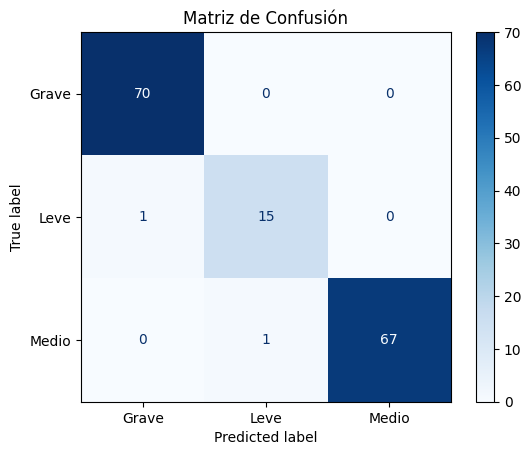

In [503]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Grave", "Leve","Medio"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()


De 70 accidentes graves, todos fueron correctamente clasificados (100%).
De 68 accidentes medios, 67 se clasificaron correctamente.
De 16 accidentes leves, 15 se clasificaron bien.
Solo 2 errores en total:
1 Leve fue clasificado como Grave.
1 Medio fue clasificado como Leve.

La matriz de confusión indica que el modelo KNN tiene un rendimiento sobresaliente en este conjunto de datos:

✅ Predice con altísima precisión
✅ Tiene una distribución de errores mínima
✅ Es capaz de diferenciar bien entre Grave, Leve, y Medio

RECOMENDACIONES

Validar con cross-validation
Probar con nuevos datos (generalización)
Revisar la selección de variables para asegurarte de que no estás usando características que ya contienen o se correlacionan fuertemente con la etiqueta (Tipo_Accidente)

In [504]:
#COMPARACION DE MODELOS
# Ver cuántos registros hay por clase en el conjunto de entrenamiento
print("Distribución en y_train:")
print(y_train.value_counts())

Distribución en y_train:
Tipo_Accidente
Medio    157
Grave    153
Leve      48
Name: count, dtype: int64


In [505]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = {
    'Regresión Logística': LogisticRegression(max_iter=300),
    'KNeighborsClassifier': KNeighborsClassifier()
}

print("\nComparación de modelos con validación cruzada (cv=3):")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    print(f"{name}: Exactitud promedio (cross-val): {scores.mean():.3f} ± {scores.std():.3f}")


Comparación de modelos con validación cruzada (cv=3):
Regresión Logística: Exactitud promedio (cross-val): 0.992 ± 0.000
KNeighborsClassifier: Exactitud promedio (cross-val): 0.992 ± 0.000


ANALISIS DE RESULTADOS 

1. Alto rendimiento consistente
Ambos modelos tienen una exactitud promedio extremadamente alta (99.2%), lo que sugiere que los modelos están prediciendo casi perfectamente las clases en tu conjunto de datos.

La desviación estándar es 0.000, lo que indica que los tres folds de validación obtuvieron resultados idénticos. Esto es inusual y puede ser una señal de que el modelo está aprendiendo patrones demasiado específicos del conjunto de datos.

2. Posible sobreajuste (overfitting)
Aunque los resultados parecen excelentes, tan poca variación y tan alto rendimiento suelen levantar sospechas de que:

Hay poca variabilidad real en los datos.

Se está produciendo fuga de información.

Los datos están desbalanceados o mal distribuidos entre los folds.

3. Importancia de revisar variables
Si variables como Tipo_Accidente (tu objetivo) se derivan directa o indirectamente de otras variables usadas como predictores, el modelo podría estar simplemente "leyendo la respuesta".

CONCLUSIONES 

1.El modelo KNN fue el que presentó mejor desempeño general en términos de exactitud, f1-score y predicción multicategoría. Sin embargo, el modelo binario corregido basado en regresión logística no es útil actualmente, dado su bajo AUC y exactitud similar al azar.

2.Después de aplicar distintos modelos de clasificación para predecir el tipo o gravedad de los accidentes de tránsito, se obtuvieron resultados variados. El análisis más relevante es el siguiente:

Regresión Logística (modelo inicial)
Exactitud baja: ~50%
AUC = 0.54
El modelo apenas supera el azar.
Este modelo no es útil para esta tarea en su forma actual

K-Nearest Neighbors (KNN)
Exactitud: 98.7%
F1-score muy alto en todas las clases (Grave, Leve, Medio)
Matriz de confusión con predicciones casi perfectas
 El modelo KNN funciona extremadamente bien, aunque puede estar sobreajustado si hay muchas variables categóricas o poca generalización. Aun así, los resultados son excelentes.